<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/DeepCV/0210_new_model_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import tensorflow as tf
import numpy as np

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


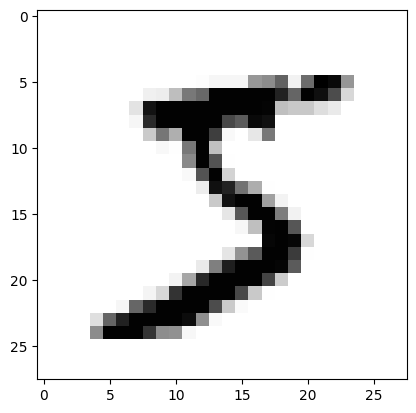

In [3]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [6]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [8]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [11]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [14]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - categorical_accuracy: 0.6593 - loss: 24.5642 - val_categorical_accuracy: 0.9318 - val_loss: 1.2562
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - categorical_accuracy: 0.9374 - loss: 0.9619 - val_categorical_accuracy: 0.9417 - val_loss: 0.7813
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - categorical_accuracy: 0.9603 - loss: 0.4051 - val_categorical_accuracy: 0.9461 - val_loss: 0.6374
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - categorical_accuracy: 0.9768 - loss: 0.1765 - val_categorical_accuracy: 0.9488 - val_loss: 0.5788
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - categorical_accuracy: 0.9847 - loss: 0.0927 - val_categorical_accuracy: 0.9510 - val_loss: 0.5461
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - categorical_accuracy: 0.9901 - loss: 0.0413 - val_categorical_accuracy: 0.9528 - val_loss: 0.5152
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - categorical_accuracy: 0.9945 - loss: 0.0204 - val

In [15]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[10.30197811126709, 0.8534935116767883, 0.3732985854148865, 0.17702500522136688, 0.08897829055786133, 0.04601757973432541, 0.022601386532187462, 0.011079621501266956, 0.004122121725231409, 0.0012740518432110548, 0.00036562600871548057, 0.0001481159561080858, 0.00010556245979387313, 9.168498945655301e-05, 8.256625733338296e-05, 7.515077595598996e-05, 6.945210043340921e-05, 6.459071300923824e-05, 6.038367428118363e-05, 5.6703116570133716e-05, 5.358665293897502e-05, 5.078721369500272e-05, 4.809437086805701e-05, 4.579658343573101e-05, 4.362814797786996e-05, 4.166695362073369e-05, 3.989176912000403e-05, 3.820188794634305e-05, 3.6672128771897405e-05, 3.52010247297585e-05]


In [16]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[1.2561886310577393, 0.7813234329223633, 0.637372612953186, 0.578824520111084, 0.5461465716362, 0.5152245163917542, 0.5057609677314758, 0.5003085732460022, 0.5013092160224915, 0.49695584177970886, 0.4919728636741638, 0.4900244474411011, 0.49002841114997864, 0.4897654354572296, 0.48965299129486084, 0.48945561051368713, 0.48919400572776794, 0.48928308486938477, 0.48906993865966797, 0.48899781703948975, 0.48879480361938477, 0.488901823759079, 0.48869580030441284, 0.48862165212631226, 0.488505482673645, 0.48842334747314453, 0.4883788228034973, 0.4882946312427521, 0.4881429374217987, 0.4881773293018341]


In [17]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.9511 - loss: 0.5402

 Test Accuracy: 0.9572


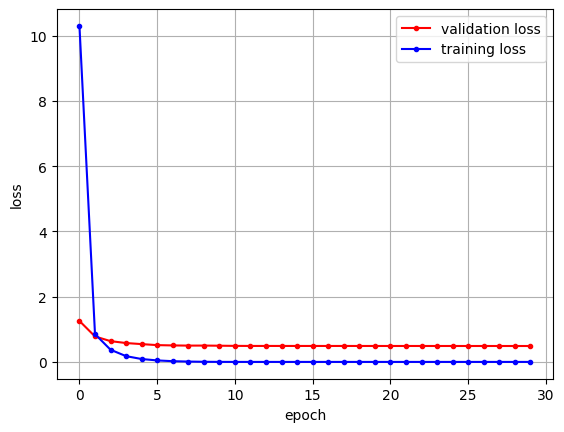

In [18]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Playground (모델 다르게 만들기)

- Hidden Layer 1줄 늘림 (hidden layer 2 -> 3)

- 학습률 2배 낮춤 (0.001 -> 0.0005)

- epoch 2배 늘림 (30 -> 60)

- batch size 늘림 (1000 -> 2000)

종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
2배씩만 조정

- Training loss와 test loss가 더 낮아질 것으로 예상

- **모델의 예측 성능이 더 좋아질 것으로 예상**

- **정확도가 0.9572보다 높아질 것으로 예상**

In [22]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 2배 낮춤 (0.001 -> 0.0005)
# epoch 2배 늘림 (30 -> 60)
# batch size 늘림 (1000 -> 2000)
# 종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
# 2배씩만 조정
# Training loss와 test loss가 더 낮아질 것으로 예상
# 모델의 예측 성능이 더 좋아질 것으로 예상

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=60, batch_size=2000, verbose=1)
print(history.history.keys())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_9']
Received: inputs=Tensor(shape=(2000, 784))
  warnings.warn(msg)


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - categorical_accuracy: 0.4724 - loss: 27.7103 - val_categorical_accuracy: 0.8645 - val_loss: 2.5413
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step - categorical_accuracy: 0.8853 - loss: 1.8355 - val_categorical_accuracy: 0.9162 - val_loss: 0.9897
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - categorical_accuracy: 0.9239 - loss: 0.7845 - val_categorical_accuracy: 0.9250 - val_loss: 0.7171
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - categorical_accuracy: 0.9431 - loss: 0.4537 - val_categorical_accuracy: 0.9311 - val_loss: 0.5897
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - categorical_accuracy: 0.9603 - loss: 0.2631 - val_categorical_accuracy: 0.9336 - val_loss: 0.5310
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - categorical_accuracy: 0.9691 - loss: 0.1901 - val_categorical_accuracy: 0.9362 - val_loss: 0.5006
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - categorical_accuracy: 0.9795 - loss: 0.1179 

In [23]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[13.838193893432617, 1.4522082805633545, 0.7005012035369873, 0.4266080856323242, 0.2770034670829773, 0.1808849275112152, 0.1172531247138977, 0.0783449187874794, 0.048779796808958054, 0.03147333115339279, 0.01952769048511982, 0.012606481090188026, 0.008654989302158356, 0.005666628945618868, 0.003942611627280712, 0.0027985956985503435, 0.0021084300242364407, 0.0016890077386051416, 0.0014590206556022167, 0.001292408094741404, 0.0011586594628170133, 0.0010491817956790328, 0.0009634098969399929, 0.0008922768174670637, 0.0008224074845202267, 0.0007679716218262911, 0.0007178533123806119, 0.000673579634167254, 0.0006339504616335034, 0.0005957380635663867, 0.0005652786348946393, 0.0005350595456548035, 0.0005073794745840132, 0.00048262346535921097, 0.00045932058128528297, 0.00043901140452362597, 0.00041842376231215894, 0.00040070145041681826, 0.0003821186546701938, 0.00036657610326074064, 0.0003520225000102073, 0.0003387554024811834, 0.00032481522066518664, 0.0003121982445009053, 0.0003009782813

In [24]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[2.5413241386413574, 0.9896740913391113, 0.7170897722244263, 0.5897465348243713, 0.5310152173042297, 0.5005919337272644, 0.4755445420742035, 0.45998212695121765, 0.4519304633140564, 0.4430055618286133, 0.4402525722980499, 0.43257975578308105, 0.4354493319988251, 0.43077802658081055, 0.4304143786430359, 0.4292730391025543, 0.4286928176879883, 0.42790064215660095, 0.42704927921295166, 0.42669743299484253, 0.4256294071674347, 0.42528286576271057, 0.42430993914604187, 0.42420583963394165, 0.42385008931159973, 0.4238539934158325, 0.42337730526924133, 0.42253682017326355, 0.4223015606403351, 0.42219752073287964, 0.42192503809928894, 0.4217618405818939, 0.42127281427383423, 0.42096129059791565, 0.420697957277298, 0.42047420144081116, 0.42059561610221863, 0.4203004539012909, 0.4197674095630646, 0.4198700487613678, 0.4196605086326599, 0.41944432258605957, 0.4191494882106781, 0.4188774824142456, 0.418913334608078, 0.4185176491737366, 0.4182264804840088, 0.41844165325164795, 0.4181203246116638, 0

In [25]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_9']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9383 - loss: 0.5239

 Test Accuracy: 0.9494


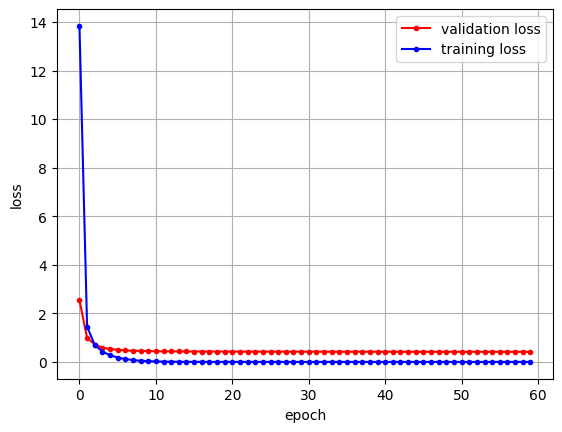

In [26]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 원인 찾기

1. Hidden Layer Layer 증가
2. 학습률 증가
3. epoch 증가
4. batch size 증가

앞서 4가지 요인을 동시에 적용시켰더니

 Test Accuracy가 0.9572에 0.9494로 예상과 다르게 감소했다.

 4가지 요인 중 어느 요인들이 정확도 감소의 원인이었을지,

 혹 각각의 요인들 간에 영향을 끼쳤을지 살펴보기 위해

 각 4가지 요인을 하나씩만 적용한 후, 정확도의 증감여부를 확인하려고 한다.


---
1. Hidden Layer Layer만 1줄 늘렸을 때
=> 정확도는 0.9602로 증가했다.

(아래 결과)

In [28]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 원상복귀 (0.001)
# epoch 원상복귀 (30)
# batch size 원상복귀 (1000)

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - categorical_accuracy: 0.5905 - loss: 24.3800 - val_categorical_accuracy: 0.9134 - val_loss: 0.6148
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - categorical_accuracy: 0.9246 - loss: 0.4399 - val_categorical_accuracy: 0.9295 - val_loss: 0.3832
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - categorical_accuracy: 0.9545 - loss: 0.2038 - val_categorical_accuracy: 0.9383 - val_loss: 0.3116
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - categorical_accuracy: 0.9740 - loss: 0.1004 - val_categorical_accuracy: 0.9421 - val_loss: 0.2842
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - categorical_accuracy: 0.9862 - loss: 0.0513 - val_categorical_accuracy: 0.9471 - val_loss: 0.2623
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - categorical_accuracy: 0.9940 - loss: 0.0282 - val_categorical_accuracy: 0.9479 - val_loss: 0.2571
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - categorical_accuracy: 0.9980 - loss: 0.012

[9.296088218688965, 0.3978225886821747, 0.1913551390171051, 0.10104849934577942, 0.05223824456334114, 0.0269621629267931, 0.013105511665344238, 0.007065697573125362, 0.004235875327140093, 0.0026983788702636957, 0.0020031153690069914, 0.0015977326547726989, 0.0013483802322298288, 0.0011609240900725126, 0.0010164284612983465, 0.0008941387059167027, 0.0007979354122653604, 0.0007188022136688232, 0.0006479700678028166, 0.0005916635855101049, 0.0005388696445152164, 0.0004934651660732925, 0.0004533969913609326, 0.0004195499059278518, 0.00038932188181206584, 0.00036061584251001477, 0.0003357541572768241, 0.00031321216374635696, 0.0002931753406301141, 0.0002741458883974701]
[0.6148488521575928, 0.38321980834007263, 0.3115728199481964, 0.2842089533805847, 0.26231446862220764, 0.2570992708206177, 0.25543537735939026, 0.25498825311660767, 0.2526194453239441, 0.2543916404247284, 0.25385531783103943, 0.25415658950805664, 0.2552309036254883, 0.2555428743362427, 0.2562824487686157, 0.25651514530181885

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9492 - loss: 0.3071

 Test Accuracy: 0.9602


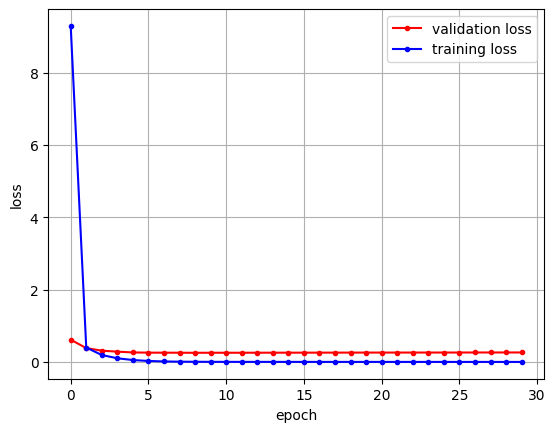

In [29]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
2. 학습률만 2배로 감소시켰을 때 => 정확도는 0.9539로 감소했다.

(아래 결과)

학습률의 0.001에서 0.0005로 줄어든 것이 꼼꼼한 학습을 돕는 효과보다 학습 속도를 과도하게 느리게 만드는 효과를 더 크게 불러일으켰다고 예상할 수 있다.

In [30]:
# 모델 다르게 만들기
# Playground
# Dense Layer 원상복귀 (hidden layer 2)
# 학습률 2배로 감소 (0.001 -> 0.0005)
# epoch 원상복귀 (30)
# batch size 원상복귀 (1000)

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_24']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - categorical_accuracy: 0.5919 - loss: 34.8185 - val_categorical_accuracy: 0.9120 - val_loss: 2.0698
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - categorical_accuracy: 0.9163 - loss: 1.7733 - val_categorical_accuracy: 0.9285 - val_loss: 1.2502
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - categorical_accuracy: 0.9416 - loss: 0.8463 - val_categorical_accuracy: 0.9386 - val_loss: 0.9586
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - categorical_accuracy: 0.9600 - loss: 0.4454 - val_categorical_accuracy: 0.9385 - val_loss: 0.9053
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - categorical_accuracy: 0.9716 - loss: 0.2551 - val_categorical_accuracy: 0.9435 - val_loss: 0.8326
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - categorical_accuracy: 0.9791 - loss: 0.1559 - val_categorical_accuracy: 0.9445 - val_loss: 0.7894
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - categorical_accuracy: 0.9853 - loss: 0.0955 - va

[14.421123504638672, 1.4835307598114014, 0.7718660235404968, 0.4341748356819153, 0.2595982253551483, 0.154344379901886, 0.09448930621147156, 0.04816901311278343, 0.028289148584008217, 0.014595046639442444, 0.005203764420002699, 0.0016750363865867257, 0.000680845754686743, 0.000409350119298324, 0.00017957534873858094, 0.00014277599984779954, 0.0001271260407520458, 0.0001154264245997183, 0.00010705416207201779, 9.962757758330554e-05, 9.327598672825843e-05, 8.76362610142678e-05, 8.271913247881457e-05, 7.847842061892152e-05, 7.479097985196859e-05, 7.11869724909775e-05, 6.794360524509102e-05, 6.495274283224717e-05, 6.227916310308501e-05, 5.984551171422936e-05]
[2.0698208808898926, 1.2502411603927612, 0.9586160778999329, 0.9053320288658142, 0.8326351642608643, 0.7893513441085815, 0.7480177283287048, 0.7282128930091858, 0.7268564701080322, 0.7290905117988586, 0.7118313908576965, 0.7108377814292908, 0.7042871117591858, 0.7032925486564636, 0.7020439505577087, 0.7017195820808411, 0.7016387581825

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_24']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.9451 - loss: 0.7036

 Test Accuracy: 0.9539


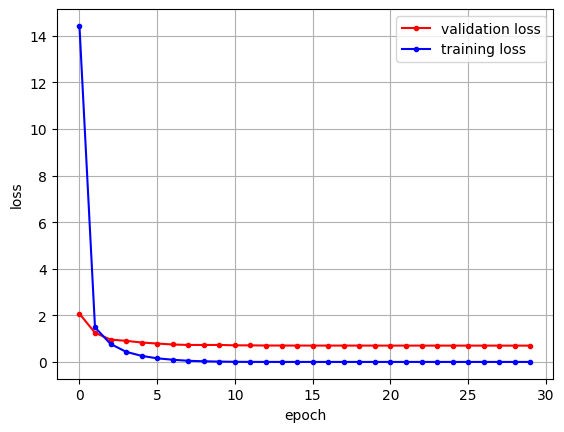

In [31]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
3. epoch만 2배로 증가했을 때 => 정확도는 0.9565로 감소했다.

epoch를 2배로 늘림으로써 학습 횟수 증가로 인한 긍정적 효과보다 과적합으로 인한 부정적 효과가 더 컸음을 예상할 수 있다.

In [32]:
# 모델 다르게 만들기
# Playground
# Dense Layer 원상복귀 (hidden layer 2)
# 학습률 원상복귀 (0.001)
# epoch 2배로 증가 (30 -> 60)
# batch size 원상복귀 (1000)

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=60, batch_size=1000, verbose=1)
print(history.history.keys())

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(1000, 784))
  warnings.warn(msg)


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - categorical_accuracy: 0.6663 - loss: 29.3597 - val_categorical_accuracy: 0.9227 - val_loss: 1.2235
Epoch 2/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - categorical_accuracy: 0.9359 - loss: 0.8643 - val_categorical_accuracy: 0.9386 - val_loss: 0.7150
Epoch 3/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - categorical_accuracy: 0.9569 - loss: 0.3692 - val_categorical_accuracy: 0.9404 - val_loss: 0.5859
Epoch 4/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - categorical_accuracy: 0.9733 - loss: 0.1754 - val_categorical_accuracy: 0.9464 - val_loss: 0.5562
Epoch 5/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - categorical_accuracy: 0.9853 - loss: 0.0774 - val_categorical_accuracy: 0.9464 - val_loss: 0.5133
Epoch 6/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - categorical_accuracy: 0.9908 - loss: 0.0411 - val_categorical_accuracy: 0.9486 - val_loss: 0.5049
Epoch 7/60
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - categorical_accuracy: 0.9947 - loss: 0.0215 - va

[11.432393074035645, 0.7649939060211182, 0.3469012379646301, 0.17217138409614563, 0.0810752809047699, 0.040486980229616165, 0.020616579800844193, 0.00929815974086523, 0.004104123450815678, 0.0019243077840656042, 0.000765790231525898, 0.00030456329113803804, 0.0002015766076510772, 0.00017050383030436933, 0.00015195398009382188, 0.00013826055510435253, 0.00012717187928501517, 0.00011754456500057131, 0.00010999295045621693, 0.000102905927633401, 9.694592881714925e-05, 9.139695612248033e-05, 8.642004104331136e-05, 8.220985910156742e-05, 7.794381963321939e-05, 7.441027264576405e-05, 7.080275099724531e-05, 6.752697663614526e-05, 6.491134263342246e-05, 6.196786853251979e-05, 5.9501533542061225e-05, 5.710890036425553e-05, 5.4853258916409686e-05, 5.272558337310329e-05, 5.088548277853988e-05, 4.886785609414801e-05, 4.705509127234109e-05, 4.5469550968846306e-05, 4.377148434286937e-05, 4.2272436985513195e-05, 4.0784427255857736e-05, 3.94623311876785e-05, 3.821223435807042e-05, 3.689149161800742e-0

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.9484 - loss: 0.5330

 Test Accuracy: 0.9565


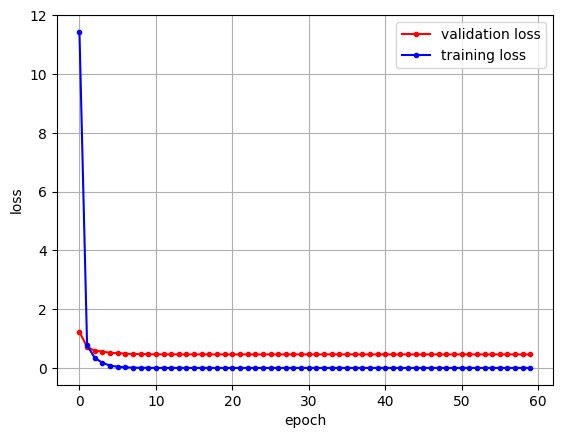

In [33]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
4. batch size만 2배로 증가했을 때 => 정확도는 0.9499로 감소했다.

(아래 결과)

batch size를 늘림으로써 안정적이고 부드러운 학습을 도와주는 효과보다 메모리 사용량을 과도하게 늘려 훈련을 어렵게 하는 효과 또는 학습의 세밀함을 낮추는 효과가 더 컸음을 예상할 수 있다.

In [34]:
# 모델 다르게 만들기
# Playground
# Dense Layer 원상복귀 (hidden layer 2)
# 학습률 원상복귀 (0.001)
# epoch 원상복귀 (30)
# batch size 원상복귀 (2000)

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=2000, verbose=1)
print(history.history.keys())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_32']
Received: inputs=Tensor(shape=(2000, 784))
  warnings.warn(msg)


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - categorical_accuracy: 0.4940 - loss: 49.1347 - val_categorical_accuracy: 0.8854 - val_loss: 3.1180
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - categorical_accuracy: 0.8926 - loss: 2.4771 - val_categorical_accuracy: 0.9222 - val_loss: 1.2795
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - categorical_accuracy: 0.9292 - loss: 0.9886 - val_categorical_accuracy: 0.9262 - val_loss: 0.9265
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - categorical_accuracy: 0.9436 - loss: 0.6043 - val_categorical_accuracy: 0.9331 - val_loss: 0.7634
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - categorical_accuracy: 0.9598 - loss: 0.3495 - val_categorical_accuracy: 0.9362 - val_loss: 0.6843
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - categorical_accuracy: 0.9687 - loss: 0.2430 - val_categorical_accuracy: 0.9375 - val_loss: 0.6352
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - categorical_accuracy: 0.9776 - loss: 0.1570 

[23.696773529052734, 2.0097570419311523, 0.9221237897872925, 0.5449385046958923, 0.349692165851593, 0.23264656960964203, 0.1536543369293213, 0.10522040724754333, 0.06988810002803802, 0.04422825202345848, 0.027770033106207848, 0.017140494659543037, 0.010544739663600922, 0.005651015788316727, 0.003204809734597802, 0.001916821813210845, 0.001349933329038322, 0.0010568187572062016, 0.0008862814283929765, 0.0007818186422809958, 0.000702562159858644, 0.0006415418465621769, 0.0005932081257924438, 0.0005480671534314752, 0.0005083242431282997, 0.00047576348879374564, 0.00044793871347792447, 0.00042065922752954066, 0.0003968878882005811, 0.00037596686161123216]
[3.118027448654175, 1.279508113861084, 0.9264593124389648, 0.7633813619613647, 0.6843400597572327, 0.635206401348114, 0.602677583694458, 0.5828102231025696, 0.562938928604126, 0.551771879196167, 0.5485514998435974, 0.5385513305664062, 0.538343608379364, 0.5369695425033569, 0.533025860786438, 0.5322789549827576, 0.5294138789176941, 0.52913

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_32']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9424 - loss: 0.5525

 Test Accuracy: 0.9499


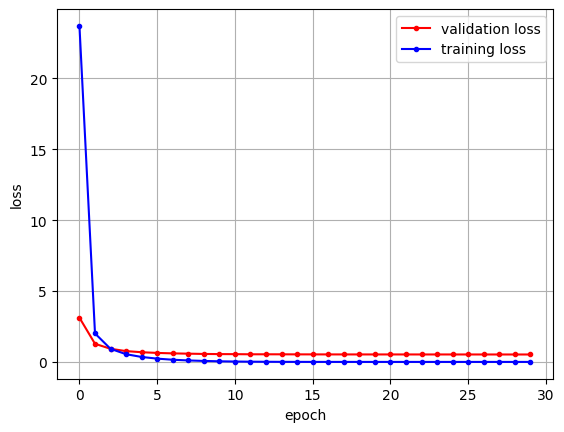

In [35]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 파라미터 사이의 상호의존성

각 파라미터들은 독립적이지 않고, 상호의존적인 관계로서 영향을 끼친다고 한다.

ex1) 학습률 ~ 배치 크기: 반비례

ex2) 배치 크기 ~ 에포크: 반비례

ex3) 학습률 ~ 에포크: 반비례

ex4) 학습률 ~ Hidden Layer layer: 반비례

인 경우 더 효과적인 경우가 많음.

이에 따라
Hidden Layer layer를 2개에서 3개로 늘렸을 경우만 더 높은 정확도를 얻었으므로,

(i) Hidden Layer layer는 3개로 고정하고,

(ii) 학습률은 0.001에서 0.00075 정도로 조금만 낮추고,

(iii) 배치 크기는 1000에서 1500 정도로 조금만 늘리겠다.

(iv) 에포크는 30 으로 유지할텐데, 이는 에포크 증가로 인한 과적합을 방지하기 위해서이다.

(에포크 증가와 조건 i, ii가 긍정적 시너지를 일으킬 수도 있지만, 그보다는 배치 크기 증가와의 조건 i, ii가 더 적은 리스크로 큰 긍정적 효과(과적합 방지, 일반화 성능 향상 etc.)를 일으킬 것이라 예상한다.)



In [36]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 조금 낮춤 (0.001 -> 0.00075)
# epoch 그대로 유지 (30)
# batch size 조금 늘림 (1000 -> 1500)
# 종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
# 2배씩만 조정
# Training loss와 test loss가 더 낮아질 것으로 예상
# 모델의 예측 성능이 더 좋아질 것으로 예상

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1500, verbose=1)
print(history.history.keys())

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_36']
Received: inputs=Tensor(shape=(1500, 784))
  warnings.warn(msg)


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - categorical_accuracy: 0.5332 - loss: 32.0089 - val_categorical_accuracy: 0.8818 - val_loss: 1.0487
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - categorical_accuracy: 0.8922 - loss: 0.8636 - val_categorical_accuracy: 0.9212 - val_loss: 0.5235
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - categorical_accuracy: 0.9317 - loss: 0.3813 - val_categorical_accuracy: 0.9281 - val_loss: 0.4142
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - categorical_accuracy: 0.9551 - loss: 0.2172 - val_categorical_accuracy: 0.9323 - val_loss: 0.3695
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - categorical_accuracy: 0.9708 - loss: 0.1278 - val_categorical_accuracy: 0.9359 - val_loss: 0.3554
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - categorical_accuracy: 0.9834 - loss: 0.0704 - val_categorical_accuracy: 0.9388 - val_loss: 0.3364
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - categorical_accuracy: 0.9902 - loss: 0.0435

[14.611481666564941, 0.7163723707199097, 0.35479676723480225, 0.2062300592660904, 0.1211082935333252, 0.07090310007333755, 0.04195025935769081, 0.024235038086771965, 0.01411508210003376, 0.008547065779566765, 0.005845231469720602, 0.0039734491147100925, 0.003050909610465169, 0.0024825111031532288, 0.002130594104528427, 0.0018300575902685523, 0.0016120077343657613, 0.0014350395649671555, 0.0012897179694846272, 0.0011636846465989947, 0.001063935924321413, 0.0009710502345114946, 0.0008931721677072346, 0.0008255367283709347, 0.0007642034906893969, 0.0007127843564376235, 0.0006623112712986767, 0.0006191059947013855, 0.0005815282929688692, 0.0005441055982373655]
[1.0486788749694824, 0.5235337615013123, 0.41415151953697205, 0.3694895803928375, 0.35540902614593506, 0.3363721966743469, 0.33232805132865906, 0.3230603337287903, 0.3193129897117615, 0.3176013231277466, 0.3151360750198364, 0.31427454948425293, 0.31298699975013733, 0.31323033571243286, 0.31279829144477844, 0.31214940547943115, 0.3119

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_36']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.9469 - loss: 0.3453

 Test Accuracy: 0.9537


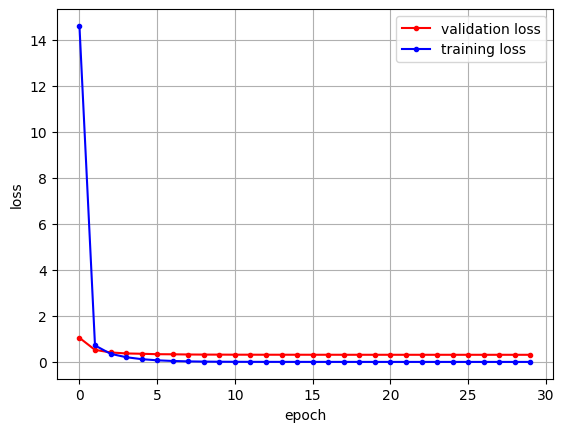

In [37]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 기존 모델 VS 새로운 모델

기존 모델의 settings =
1. Hidden Layer layer 2개
2. 학습률 0.001
3. epoch 30
4. batch size 1000
5. 기존 모델의 정확도 = 0.9572

새로운 모델의 settings =
1. Hidden Layer layer 3개
2. 학습률 0.00075
3. epoch 30
4. batch size 1500
5. 새로운 모델의 정확도 = 0.9537

=> 오히려 정확도가 감소하는, 예상과 다른 결과
---
---

# 새로운 모델 ver.2

파라미터의 수정 정도가 과했을 것을 예상하여,

아래와 같이 조금씩 파라미터를 수정하고 다시 정확도를 측정했다.

새로운 모델 ver.2 의 settings =

Hidden Layer layer 3개

학습률 0.000875

epoch 30

batch size 1250

In [42]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 더 조금만 낮춤 (0.001 -> 0.000875)
# epoch 그대로 유지 (30)
# batch size 더 조금만 늘림 (1000 -> 1250)
# 종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
# 2배씩만 조정
# Training loss와 test loss가 더 낮아질 것으로 예상
# 모델의 예측 성능이 더 좋아질 것으로 예상

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000875)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1250, verbose=1)
print(history.history.keys())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_51']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - categorical_accuracy: 0.5569 - loss: 28.7779 - val_categorical_accuracy: 0.9029 - val_loss: 0.7351
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - categorical_accuracy: 0.9107 - loss: 0.5647 - val_categorical_accuracy: 0.9252 - val_loss: 0.3923
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - categorical_accuracy: 0.9469 - loss: 0.2435 - val_categorical_accuracy: 0.9329 - val_loss: 0.3261
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - categorical_accuracy: 0.9629 - loss: 0.1484 - val_categorical_accuracy: 0.9415 - val_loss: 0.2871
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - categorical_accuracy: 0.9790 - loss: 0.0816 - val_categorical_accuracy: 0.9437 - val_loss: 0.2751
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - categorical_accuracy: 0.9885 - loss: 0.0441 - val_categorical_accuracy: 0.9462 - val_loss: 0.2660
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - categorical_accuracy: 0.9934 - loss: 0.028

[11.956513404846191, 0.4859006404876709, 0.24441799521446228, 0.14212481677532196, 0.08089819550514221, 0.04709398001432419, 0.028314631432294846, 0.016259880736470222, 0.009039020165801048, 0.005409803241491318, 0.003893620800226927, 0.0028262531850486994, 0.0022527887485921383, 0.0019026640802621841, 0.0016362759051844478, 0.0014365457464009523, 0.0012708230642601848, 0.001139516825787723, 0.001024183933623135, 0.0009282994433306158, 0.0008468429441563785, 0.0007735007093288004, 0.0007119136862456799, 0.0006577568128705025, 0.000607876165304333, 0.0005664628115482628, 0.0005264309584163129, 0.0004905248642899096, 0.00045899837277829647, 0.0004304652684368193]
[0.7350587844848633, 0.3923304080963135, 0.3261241316795349, 0.28708183765411377, 0.27510935068130493, 0.26603183150291443, 0.2584782838821411, 0.2560703456401825, 0.2567090392112732, 0.2577417492866516, 0.2539677619934082, 0.2549942433834076, 0.25539329648017883, 0.25543084740638733, 0.2554292678833008, 0.2558335065841675, 0.25

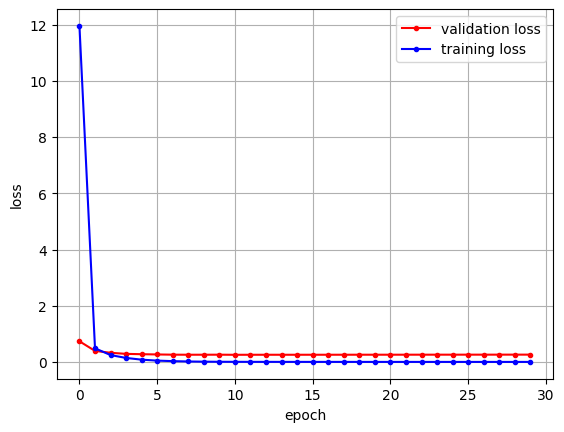

In [43]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 기존 모델 VS 새로운 모델 VS ver2.

기존 모델의 settings =
1. Hidden Layer layer 2개
2. 학습률 0.001
3. epoch 30
4. batch size 1000
5. 기존 모델의 정확도 = 0.9572

새로운 모델의 settings =
1. Hidden Layer layer 3개
2. 학습률 0.00075
3. epoch 30
4. batch size 1500
5. 새로운 모델의 정확도 = 0.9537

새로운 모델 ver.2 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 30
4. batch size 1250
5. 새로운 모델 ver2.의 정확도 = 0.9587

=> 첫 기존 모델보다 정확도 증가!! (0.9572 -> 0.9587)
---


---
# 추가 개선

1. 정규화 기법 (dropout, L2, 배치 정규화 etc.)
2. 학습률 점진적 조정 (learning rate scheduler 사용하여 학습률 점진적 감소)
3. batch size 증가량 감소 (1250에서 1100 정도로 조정)
4. epoch 조금 늘리기 (40 정도로 조정)

이 중 4번째와 3번째 방법 순으로 사용해보려고 한다.

---

# 4번 solution. epoch 조금 늘리기 (40 정도로 조정)
# 모델 ver3.

In [44]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 더 조금만 낮춤 (0.001 -> 0.000875)
# epoch 조금 증가 (40)
# batch size 더 조금만 늘림 (1000 -> 1250)
# 종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
# 2배씩만 조정
# Training loss와 test loss가 더 낮아질 것으로 예상
# 모델의 예측 성능이 더 좋아질 것으로 예상

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000875)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=40, batch_size=1250, verbose=1)
print(history.history.keys())

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_56']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - categorical_accuracy: 0.5723 - loss: 27.3289 - val_categorical_accuracy: 0.9006 - val_loss: 0.8203
Epoch 2/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - categorical_accuracy: 0.9158 - loss: 0.5739 - val_categorical_accuracy: 0.9238 - val_loss: 0.4213
Epoch 3/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - categorical_accuracy: 0.9442 - loss: 0.2541 - val_categorical_accuracy: 0.9336 - val_loss: 0.3507
Epoch 4/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - categorical_accuracy: 0.9641 - loss: 0.1440 - val_categorical_accuracy: 0.9365 - val_loss: 0.3226
Epoch 5/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - categorical_accuracy: 0.9772 - loss: 0.0851 - val_categorical_accuracy: 0.9427 - val_loss: 0.2928
Epoch 6/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - categorical_accuracy: 0.9852 - loss: 0.0538 - val_categorical_accuracy: 0.9448 - val_loss: 0.2827
Epoch 7/40
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - categorical_accuracy: 0.9916 - loss: 0.03

[10.873283386230469, 0.5006416440010071, 0.2476692646741867, 0.13890378177165985, 0.0852753072977066, 0.05245496705174446, 0.030210264027118683, 0.016811035573482513, 0.010508893057703972, 0.006439950317144394, 0.003896450623869896, 0.002927342662587762, 0.002270573051646352, 0.0018855793168768287, 0.0016377572901546955, 0.0014417018974199891, 0.0012730805901810527, 0.0011327493702992797, 0.0010203137062489986, 0.0009343922138214111, 0.000849071133416146, 0.0007776609854772687, 0.0007161289104260504, 0.0006641179206781089, 0.0006157946772873402, 0.0005741781205870211, 0.000534210994374007, 0.0004982768441550434, 0.00046674333862029016, 0.00043727547745220363, 0.0004118673678021878, 0.0003882547898683697, 0.0003656598273664713, 0.000346241460647434, 0.00032849947456270456, 0.00031087055685929954, 0.00029525067657232285, 0.00028041627956554294, 0.0002668393135536462, 0.0002538366534281522]
[0.820296049118042, 0.42134740948677063, 0.35069289803504944, 0.3225935995578766, 0.292804986238479

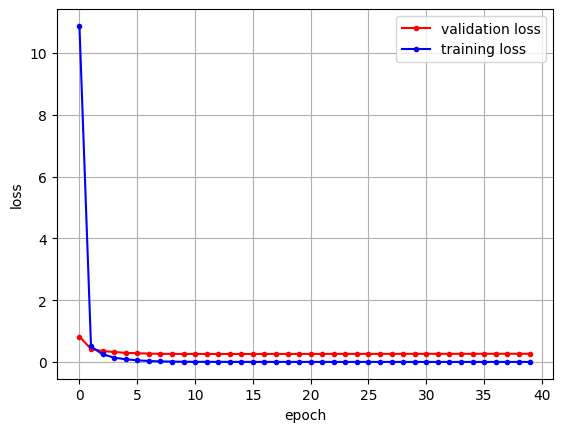

In [46]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 기존 모델 VS 새로운 모델 VS ver2. VS ver3.

기존 모델의 settings =
1. Hidden Layer layer 2개
2. 학습률 0.001
3. epoch 30
4. batch size 1000
5. 기존 모델의 정확도 = 0.9572

새로운 모델의 settings =
1. Hidden Layer layer 3개
2. 학습률 0.00075
3. epoch 30
4. batch size 1500
5. 새로운 모델의 정확도 = 0.9537

새로운 모델 ver.2 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 30
4. batch size 1250
5. 새로운 모델 ver2.의 정확도 = 0.9587

새로운 모델 ver3. 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 40
4. batch size 1250
5. 새로운 모델 ver3.의 정확도 = 0.9593

=> epoch 소량 증가(30->40)는 긍정적인 효과를 보임!!
---
=> 정확도 증가!! (0.9531 -> 0.9587 -> 0.9593)
---

---
# 3번 solution. batch size 증가량 감소 (1250에서 1100 정도로 조정) 모델 ver4.

'epoch 증가'와 'batch 감소'는 각각의 조정 정도가 적절하다는 전제 하에

긍정적인 시너지 효과를 내므로,

ver2.가 아닌 ver3.에 그대로 batch size 증가를 적용하기로 했다.

In [47]:
# 모델 다르게 만들기
# Playground
# Dense Layer 1줄 늘림 (hidden layer 2 -> 3)
# 학습률 더 조금만 낮춤 (0.001 -> 0.000875)
# epoch 조금 증가 (40)
# batch size 다시 조금 감소 (1000 -> 1100)
# 종합적으로 과도하게 학습 속도가 느려지거나, 과적합이 오지 않도록
# 2배씩만 조정
# Training loss와 test loss가 더 낮아질 것으로 예상
# 모델의 예측 성능이 더 좋아질 것으로 예상

# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 3

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000875)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=40, batch_size=1100, verbose=1)
print(history.history.keys())

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_61']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - categorical_accuracy: 0.5894 - loss: 23.8787 - val_categorical_accuracy: 0.9084 - val_loss: 0.7408
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - categorical_accuracy: 0.9210 - loss: 0.5331 - val_categorical_accuracy: 0.9260 - val_loss: 0.4378
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - categorical_accuracy: 0.9499 - loss: 0.2450 - val_categorical_accuracy: 0.9356 - val_loss: 0.3646
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - categorical_accuracy: 0.9689 - loss: 0.1269 - val_categorical_accuracy: 0.9396 - val_loss: 0.3375
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - categorical_accuracy: 0.9826 - loss: 0.0703 - val_categorical_accuracy: 0.9456 - val_loss: 0.3069
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - categorical_accuracy: 0.9911 - loss: 0.0387 - val_categorical_accuracy: 0.9463 - val_loss: 0.2963
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - categorical_accuracy: 0.9958 - loss: 0.019

[9.347332000732422, 0.47466760873794556, 0.23301425576210022, 0.12740619480609894, 0.0703064426779747, 0.03819049894809723, 0.019577957689762115, 0.010102607309818268, 0.005779899191111326, 0.003415268613025546, 0.002394413109868765, 0.0018708787392824888, 0.0015486791962757707, 0.0013301053550094366, 0.0011685965582728386, 0.0010348637588322163, 0.000924799358472228, 0.000832602905575186, 0.0007590258028358221, 0.0006899067666381598, 0.0006350703770294785, 0.0005855902563780546, 0.0005421866662800312, 0.0005027253064326942, 0.0004662762803491205, 0.0004348864022176713, 0.0004081919905729592, 0.00038122085970826447, 0.0003576961753424257, 0.00033623023773543537, 0.00031660732929594815, 0.00029911240562796593, 0.00028258239035494626, 0.0002676871372386813, 0.00025328906485810876, 0.00024053172091953456, 0.00022822113533038646, 0.0002171133819501847, 0.00020650762598961592, 0.0001969003933481872]
[0.740822434425354, 0.437764972448349, 0.3646496534347534, 0.3375048041343689, 0.30686455965

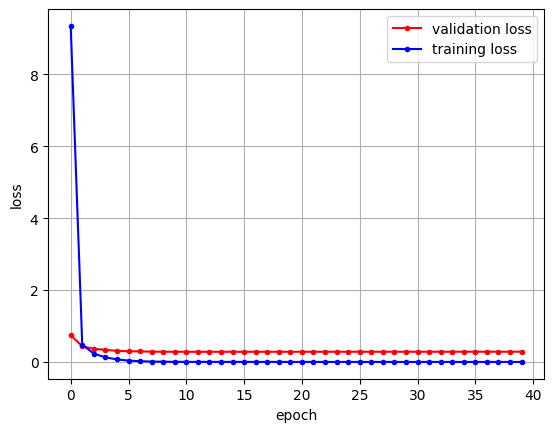

In [48]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 기존 모델 VS 새로운 모델 VS ver2. VS ver3. VS ver4.

기존 모델의 settings =
1. Hidden Layer layer 2개
2. 학습률 0.001
3. epoch 30
4. batch size 1000
5. 기존 모델의 정확도 = 0.9572

새로운 모델의 settings =
1. Hidden Layer layer 3개
2. 학습률 0.00075
3. epoch 30
4. batch size 1500
5. 새로운 모델의 정확도 = 0.9537

새로운 모델 ver.2 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 30
4. batch size 1250
5. 새로운 모델 ver2.의 정확도 = 0.9587

새로운 모델 ver3. 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 40
4. batch size 1250
5. 새로운 모델 ver3.의 정확도 = 0.9593

새로운 모델 ver4. 의 settings =

1. Hidden Layer layer 3개
2. 학습률 0.000875
3. epoch 40
4. batch size 1100
5. 새로운 모델 ver4.의 정확도 = 0.9563

# => batch size 감소는 정확도를 오히려 낮추는 결과를 일으켰다.

data의 크기에 비해 학습 속도를 과도하게 느리게 하여 학습의 효율을 떨어뜨렸을 것이다.

---

# 최종 개선 모델 = ver3.

모델 ver3. 로 설정 (가장 높은 정확도 0.9593)

ver3. settings =

Hidden Layer layer 3개
학습률 0.000875
epoch 40
batch size 1250
새로운 모델 ver3.의 정확도 = 0.9593

---

기존 모델 settings =

Hidden Layer layer 2개
학습률 0.001
epoch 30
batch size 1000
기존 모델의 정확도 = 0.9572

---